In [ ]:
import os
import shutil
import zipfile
from PIL import Image
from distutils.dir_util import copy_tree
from tqdm import tqdm

import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!cp -r /content/drive/Shareddrives/Sam/Tajik/CarlaEmpty/1.zip ./

In [ ]:
FILE_NAME = '1.zip'
SRC = '1'
IMAGE_SHAPE = (88, 200 , 3)

In [ ]:
zip_ref = zipfile.ZipFile(FILE_NAME)
zip_ref.extractall('.')
zip_ref.close()
# os.remove(FILE_NAME)

In [ ]:
csv = os.path.join(SRC, 'data.csv')
df = pd.read_csv(csv)
df.head(100_000)

image_name     steer  throttle  brake      speed  \
0        2022-05-07_10-53-31_220.jpg  0.000000      0.00    0.0   0.000000   
1        2022-05-07_10-53-31_221.jpg  0.000000      0.00    0.0   0.000000   
2        2022-05-07_10-53-31_222.jpg  0.084126      0.85    0.0   0.001653   
3        2022-05-07_10-53-31_223.jpg  0.084126      0.85    0.0   0.001079   
4        2022-05-07_10-53-31_224.jpg  0.084126      0.85    0.0   0.001079   
...                              ...       ...       ...    ...        ...   
24995  2022-05-07_10-53-31_25215.jpg -0.000616      0.85    0.0  16.733900   
24996  2022-05-07_10-53-31_25216.jpg -0.000616      0.85    0.0  16.808855   
24997  2022-05-07_10-53-31_25217.jpg -0.000616      0.85    0.0  16.883207   
24998  2022-05-07_10-53-31_25218.jpg -0.000440      0.85    0.0  16.960585   
24999  2022-05-07_10-53-31_25219.jpg -0.000440      0.85    0.0  17.034376   

                x           y         z        yaw  speed_limit  \
0       92.109978  299.781464  0.001358 -90.000267         30.0   
1       92.109978  299.781464  0.001358 -90.000267         30.0   
2       92.109978  299.781464  0.001330 -90.000267         30.0   
3       92.109978  299.781464  0.001292 -90.000267         30.0   
4       92.109978  299.781464  0.001292 -90.000267         30.0   
...           ...         ...       ...        ...          ...   
24995  130.659409  330.593201  0.001525   0.014762         90.0   
24996  130.964233  330.593323  0.001526   0.013230         90.0   
24997  131.268539  330.593323  0.001526   0.011331         90.0   
24998  131.587265  330.593323  0.001527   0.009175         90.0   
24999  131.893158  330.593353  0.001527   0.007021         90.0   

       is_traffic_light  traffic_light_state  
0                 False                    2  
1                 False                    2  
2                 False                    2  
3                 False                    2  
4                 False                    2  
...                 ...                  ...  
24995             False                    2  
24996             False                    2  
24997             False                    2  
24998             False                    2  
24999             False                    2  

[25000 rows x 12 columns]

In [ ]:
rslt_df = df[(df['is_traffic_light'] == True) & (df['traffic_light_state'] == 0)]

In [ ]:
rslt_df

image_name     steer  throttle     brake     speed  \
557      2022-05-07_10-53-31_777.jpg  0.000000  0.284159  0.000000  6.650404   
1020    2022-05-07_10-53-31_1240.jpg  0.000000  0.000000  0.123746  7.146520   
1563    2022-05-07_10-53-31_1783.jpg  0.000000  0.035800  0.000000  6.521179   
3770    2022-05-07_10-53-31_3990.jpg  0.000000  0.231026  0.000000  6.486084   
5945    2022-05-07_10-53-31_6165.jpg  0.000000  0.419913  0.000000  6.404090   
5946    2022-05-07_10-53-31_6166.jpg  0.000000  0.419913  0.000000  6.404090   
7674    2022-05-07_10-53-31_7894.jpg  0.000000  0.000000  0.297878  6.916193   
7675    2022-05-07_10-53-31_7895.jpg  0.000000  0.000000  0.297878  6.916193   
8143    2022-05-07_10-53-31_8363.jpg -0.000367  0.211096  0.000000  6.742778   
8677    2022-05-07_10-53-31_8897.jpg -0.000440  0.000000  0.021323  6.526184   
13088  2022-05-07_10-53-31_13308.jpg  0.000000  0.082875  0.000000  7.538291   
13089  2022-05-07_10-53-31_13309.jpg  0.000000  0.082875  0.000000  7.538291   
14967  2022-05-07_10-53-31_15187.jpg  0.000000  0.000000  0.045537  6.730250   
14968  2022-05-07_10-53-31_15188.jpg  0.000000  0.000000  0.045537  6.730250   
16697  2022-05-07_10-53-31_16917.jpg  0.000000  0.000000  0.381243  6.743618   
17712  2022-05-07_10-53-31_17932.jpg  0.000176  0.545970  0.000000  6.115735   
20444  2022-05-07_10-53-31_20664.jpg  0.000440  0.000000  0.318044  6.563752   
20445  2022-05-07_10-53-31_20665.jpg  0.000440  0.000000  0.318044  6.498161   
20826  2022-05-07_10-53-31_21046.jpg -0.000616  0.000000  0.382740  6.931227   
21696  2022-05-07_10-53-31_21916.jpg  0.000000  0.341700  0.000000  6.540606   
22214  2022-05-07_10-53-31_22434.jpg  0.000000  0.199812  0.000000  6.235157   
24577  2022-05-07_10-53-31_24797.jpg  0.000000  0.151258  0.000000  7.598640   

                x           y         z         yaw  speed_limit  \
557     92.402878  220.048309  0.001849  -90.005974         30.0   
1020    92.394119  155.213791  0.001835  -90.004303         30.0   
1563    92.382225   80.692871  0.001988  -90.010376         30.0   
3770   334.834686  108.246704  0.002021   90.035217         30.0   
5945    88.395508  174.886078  0.001907   89.980446         30.0   
5946    88.395508  174.886078  0.001907   89.980446         30.0   
7674   312.445953  199.159058  0.001902   -0.012756         30.0   
7675   312.445953  199.159058  0.001902   -0.012756         30.0   
8143   338.808716  154.492142  0.001828  -89.964684         30.0   
8677   338.853699   79.679497  0.001836  -89.974854         30.0   
13088   63.547695  330.568115  0.001854    0.031808         30.0   
13089   63.694340  330.568207  0.001849    0.031806         30.0   
14967  338.767517  219.580139  0.001826  -89.971031         30.0   
14968  338.767517  219.580139  0.001826  -89.971031         30.0   
16697  113.740448  195.139511  0.001906  179.999496         30.0   
17712   88.415527  306.207794  0.001986   89.977058         30.0   
20444   67.248230    1.961238  0.001986   -0.009186         30.0   
20445   67.372276    1.961237  0.001998   -0.008026         30.0   
20826   88.374763   35.481663  0.001775   90.005600         30.0   
21696  158.052536   22.798246  0.001893  -89.929688         30.0   
22214  112.824272   -2.049669  0.001877 -179.994019         30.0   
24577   63.786236  330.566345  0.001831    0.037575         30.0   

       is_traffic_light  traffic_light_state  
557                True                    0  
1020               True                    0  
1563               True                    0  
3770               True                    0  
5945               True                    0  
5946               True                    0  
7674               True                    0  
7675               True                    0  
8143               True                    0  
8677               True                    0  
13088              True                    0  
13089              True                    0  
14967    

In [ ]:
df.describe()

steer      throttle         brake         speed             x  \
count  25000.000000  25000.000000  25000.000000  25000.000000  25000.000000   
mean      -0.008706      0.419329      0.100001      8.922240    142.311792   
std        0.102365      0.359901      0.187807      3.901637    111.669586   
min       -0.483028      0.000000      0.000000      0.000000     -2.060121   
25%       -0.000220      0.000000      0.000000      7.649537     62.617639   
50%        0.000000      0.418992      0.000000      8.012765    106.040882   
75%        0.000000      0.850000      0.126737      8.499084    234.567638   
max        0.800000      0.850000      1.000000     24.695642    338.857330   

                  y             z           yaw   speed_limit  \
count  25000.000000  25000.000000  25000.000000  25000.000000   
mean     151.445470      0.001813     -4.134269     36.948000   
std      108.490219      0.000343    114.233288     18.778589   
min       -2.049778     -0.000444   -179.999954     30.000000   
25%       56.570965      0.001716    -90.001541     30.000000   
50%      131.237198      0.001856     -0.001755     30.000000   
75%      223.715103      0.001965     89.996517     30.000000   
max      330.610413      0.011121    179.999969     90.000000   

       traffic_light_state  
count         25000.000000  
mean              1.998160  
std               0.059973  
min               0.000000  
25%               2.000000  
50%               2.000000  
75%               2.000000  
max               2.000000

In [ ]:
wps = np.load(os.path.join(SRC, 'waypoints.npy'))

In [ ]:
wps.shape

(24892, 10, 2)

In [ ]:
!cp /content/drive/Shareddrives/Sam/Tajik/1.npy ./

In [ ]:
w1 = np.load('1.npy')

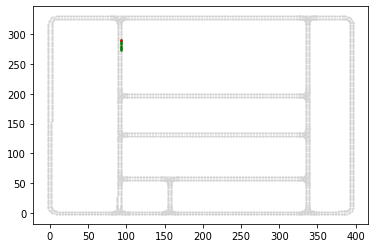

In [ ]:
idx = 100

plt.scatter(w1[:,0], w1[:,1], s=1, color='lightgrey')
plt.scatter(wps[idx,:,0], wps[idx,:,1], s=2, color='green')
plt.scatter(df.loc[idx]['x'], df.loc[idx]['y'], s=2, color='r')
plt.show()

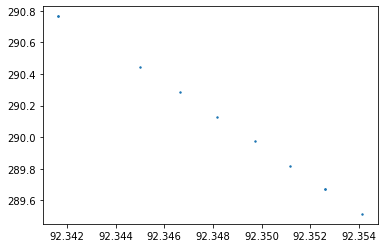

In [ ]:
x = df['x'].to_numpy()[idx:idx+10]
y = df['y'].to_numpy()[idx:idx+10]

plt.scatter(x, y, s=2)
plt.show()

In [ ]:
def normalize_points(set_of_points, z_rotate):
    yaw = z_rotate * np.pi/180
    s = set_of_points - set_of_points[0]
    # diffs = s[1:] - s[:-1]
    # norm_speed = (speeds[1:] + speeds[:-1])/2
    # norm_diffs = diffs / np.expand_dims(norm_speed, axis=-1)
    # s = np.cumsum(norm_diffs, axis=0)
    R = np.array([[np.cos(yaw), -np.sin(yaw)],
                  [np.sin(yaw), np.cos(yaw)]])
    s = s @ R
    return s

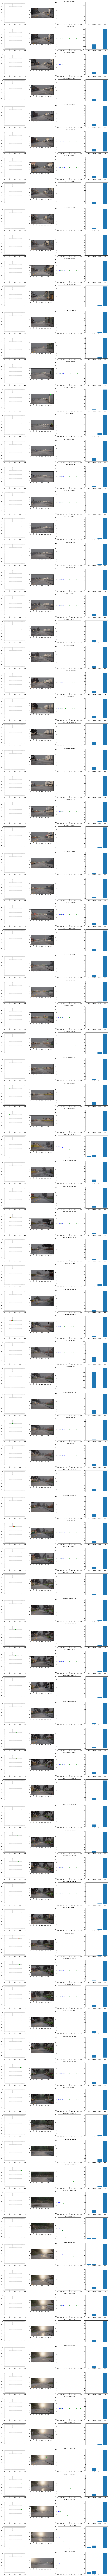

In [ ]:
l = 100
SKIP = 40
fields = ['steer', 'throttle', 'brake', 'speed']

controls = df[fields].to_numpy()[::SKIP]
x = df['x'].to_numpy()
y = df['y'].to_numpy()
coor = np.vstack((x,y)).T
img = df['image_name'].to_numpy()[::SKIP]
wayps = wps[::SKIP]
yaws = df['yaw'].to_numpy()[::SKIP]

fig, axes = plt.subplots(l, 4, figsize=(20, l * 5))
for i, (ax1, img_ax, ax2, ax3) in enumerate(axes):
    ax1.scatter(w1[:,0], w1[:,1], s=1, color='lightgrey')
    ax1.scatter(wayps[i, :, 0], wayps[i, :, 1], s=2, color='green')
    ax1.scatter(coor[SKIP*i, 0], coor[SKIP*i, 1], s=2, color='r')
    ax1.invert_yaxis()

    image = plt.imread("./1/images/" + img[i])
    img_ax.imshow(image)

    cor = normalize_points(coor[i*SKIP: i*SKIP+40:4], yaws[i])
    ax2.scatter(cor[:, 0], cor[:, 1], s=2, color='b')
    wpp = normalize_points(wayps[i], yaws[i])
    ax2.set_title(str(yaws[i]))
    ax2.scatter(wpp[:, 0], wpp[:, 1], s=2, color='green')
    ax2.scatter(cor[0, 0], cor[0, 1], s=2, color='r')
    ax2.set_xlim([0, 20])
    ax2.set_ylim([10,-10])
    
    
    ax3.bar(fields, controls[i])
    # ax3.set_ylim(-1, 1)